# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [1]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Database Connection

In [9]:
#connection = sqlite3.connect(r"cripto.db")
connection = sqlite3.connect(r"../database/cripto_one_day.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by VolumeBUSD").fetchall()

## Dataframe

In [10]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,BTCBUSD,27927.34,27927.34,27913.79,27919.48,12.36963,-0.028144463454094,1.679913e+12,3.453526e+05,222.0,6.53738,1679912820
1,2,BTCBUSD,27919.48,27919.48,27902.64,27911.68,21.92124,-0.0279374830763298,1.679913e+12,6.117955e+05,266.0,8.48522,1679912880
2,3,BTCBUSD,27911.68,27913.90,27894.17,27895.42,10.31266,-0.0582551820599908,1.679913e+12,2.877500e+05,227.0,3.34181,1679912940
3,4,BTCBUSD,27895.41,27909.14,27894.18,27908.98,6.67401,0.0486459958824757,1.679913e+12,1.862070e+05,167.0,2.90861,1679913000
4,5,BTCBUSD,27908.61,27912.89,27908.60,27912.88,2.38684,0.015299937904469,1.679913e+12,6.662049e+04,102.0,0.89579,1679913060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,26858.52,26858.53,26763.00,26795.24,124.63984,-0.235604940257314,1.679999e+12,3.340630e+06,2266.0,36.85873,1679998920
1436,1437,BTCBUSD,26795.25,26849.92,26795.25,26829.16,38.72551,0.126552280721396,1.679999e+12,1.038834e+06,581.0,17.59227,1679998980
1437,1438,BTCBUSD,26828.30,26851.46,26731.00,26743.31,80.96602,-0.316792342414532,1.679999e+12,2.169322e+06,1388.0,42.55541,1679999040
1438,1439,BTCBUSD,26743.31,26797.51,26743.31,26795.58,39.48086,0.195450750112834,1.679999e+12,1.057028e+06,542.0,14.66013,1679999100


## Name Columns

In [11]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,27927.34,27927.34,27913.79,27919.48,12.36963,-0.028144463454094,1.679913e+12,3.453526e+05,222.0,6.53738,1679912820
1,2,BTCBUSD,27919.48,27919.48,27902.64,27911.68,21.92124,-0.0279374830763298,1.679913e+12,6.117955e+05,266.0,8.48522,1679912880
2,3,BTCBUSD,27911.68,27913.90,27894.17,27895.42,10.31266,-0.0582551820599908,1.679913e+12,2.877500e+05,227.0,3.34181,1679912940
3,4,BTCBUSD,27895.41,27909.14,27894.18,27908.98,6.67401,0.0486459958824757,1.679913e+12,1.862070e+05,167.0,2.90861,1679913000
4,5,BTCBUSD,27908.61,27912.89,27908.60,27912.88,2.38684,0.015299937904469,1.679913e+12,6.662049e+04,102.0,0.89579,1679913060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,26858.52,26858.53,26763.00,26795.24,124.63984,-0.235604940257314,1.679999e+12,3.340630e+06,2266.0,36.85873,1679998920
1436,1437,BTCBUSD,26795.25,26849.92,26795.25,26829.16,38.72551,0.126552280721396,1.679999e+12,1.038834e+06,581.0,17.59227,1679998980
1437,1438,BTCBUSD,26828.30,26851.46,26731.00,26743.31,80.96602,-0.316792342414532,1.679999e+12,2.169322e+06,1388.0,42.55541,1679999040
1438,1439,BTCBUSD,26743.31,26797.51,26743.31,26795.58,39.48086,0.195450750112834,1.679999e+12,1.057028e+06,542.0,14.66013,1679999100


# Make a Candle plot

In [12]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2023-03-27 10:27:59.999000064,1,BTCBUSD,27927.34,27927.34,27913.79,27919.48,12.36963,-0.028144463454094,3.453526e+05,222.0,6.53738,1679912820
2023-03-27 10:28:59.999000064,2,BTCBUSD,27919.48,27919.48,27902.64,27911.68,21.92124,-0.0279374830763298,6.117955e+05,266.0,8.48522,1679912880
2023-03-27 10:29:59.999000064,3,BTCBUSD,27911.68,27913.90,27894.17,27895.42,10.31266,-0.0582551820599908,2.877500e+05,227.0,3.34181,1679912940
2023-03-27 10:30:59.999000064,4,BTCBUSD,27895.41,27909.14,27894.18,27908.98,6.67401,0.0486459958824757,1.862070e+05,167.0,2.90861,1679913000
2023-03-27 10:31:59.999000064,5,BTCBUSD,27908.61,27912.89,27908.60,27912.88,2.38684,0.015299937904469,6.662049e+04,102.0,0.89579,1679913060
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 10:22:59.999000064,1436,BTCBUSD,26858.52,26858.53,26763.00,26795.24,124.63984,-0.235604940257314,3.340630e+06,2266.0,36.85873,1679998920
2023-03-28 10:23:59.999000064,1437,BTCBUSD,26795.25,26849.92,26795.25,26829.16,38.72551,0.126552280721396,1.038834e+06,581.0,17.59227,1679998980
2023-03-28 10:24:59.999000064,1438,BTCBUSD,26828.30,26851.46,26731.00,26743.31,80.96602,-0.316792342414532,2.169322e+06,1388.0,42.55541,1679999040


# Super Trend

https://medium.com/codex/step-by-step-implementation-of-the-supertrend-indicator-in-python-656aa678c111

In [13]:
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,27927.34,27927.34,27913.79,27919.48,12.36963,-0.028144463454094,3.453526e+05,222.0,6.53738,1679912820
1,2,BTCBUSD,27919.48,27919.48,27902.64,27911.68,21.92124,-0.0279374830763298,6.117955e+05,266.0,8.48522,1679912880
2,3,BTCBUSD,27911.68,27913.90,27894.17,27895.42,10.31266,-0.0582551820599908,2.877500e+05,227.0,3.34181,1679912940
3,4,BTCBUSD,27895.41,27909.14,27894.18,27908.98,6.67401,0.0486459958824757,1.862070e+05,167.0,2.90861,1679913000
4,5,BTCBUSD,27908.61,27912.89,27908.60,27912.88,2.38684,0.015299937904469,6.662049e+04,102.0,0.89579,1679913060
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1436,BTCBUSD,26858.52,26858.53,26763.00,26795.24,124.63984,-0.235604940257314,3.340630e+06,2266.0,36.85873,1679998920
1436,1437,BTCBUSD,26795.25,26849.92,26795.25,26829.16,38.72551,0.126552280721396,1.038834e+06,581.0,17.59227,1679998980
1437,1438,BTCBUSD,26828.30,26851.46,26731.00,26743.31,80.96602,-0.316792342414532,2.169322e+06,1388.0,42.55541,1679999040
1438,1439,BTCBUSD,26743.31,26797.51,26743.31,26795.58,39.48086,0.195450750112834,1.057028e+06,542.0,14.66013,1679999100


In [16]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)

df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100

print(df['rsisignal'].to_string())


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10     -100
11     -100
12     -100
13     -100
14        0
15        0
16      100
17      100
18        0
19        0
20     -100
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38     -100
39     -100
40     -100
41        0
42        0
43        0
44     -100
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54     -100
55     -100
56        0
57        0
58        0
59        0
60      100
61      100
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69      100
70      100
71      100
72        0
73        0
74      100
75      100
76        0
77      100
78        0
79      100
80      100
81      100
82      100
83  

# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

In [14]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3  

In [17]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,-100,...,0,0,0,0,0,0,0,0,100,0
1436,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,100
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,100
1438,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0,0,400


In [18]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

## Combine two Dataframe

In [19]:
df = df.astype(float)


In [20]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,6.53738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27919.48,27927.34,27913.79,27927.34,0.0,222.0,12.36963,3.453526e+05,0.000000,0.0
1,8.48522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27911.68,27919.48,27902.64,27919.48,0.0,266.0,21.92124,6.117955e+05,0.000000,0.0
2,3.34181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27895.42,27913.90,27894.17,27911.68,0.0,227.0,10.31266,2.877500e+05,0.000000,0.0
3,2.90861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27908.98,27909.14,27894.18,27895.41,0.0,167.0,6.67401,1.862070e+05,0.000000,0.0
4,0.89579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27912.88,27912.89,27908.60,27908.61,0.0,102.0,2.38684,6.662049e+04,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,36.85873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26795.24,26858.53,26763.00,26858.52,0.0,2266.0,124.63984,3.340630e+06,104.944914,100.0
1436,17.59227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26829.16,26849.92,26795.25,26795.25,100.0,581.0,38.72551,1.038834e+06,32.354414,0.0
1437,42.55541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26743.31,26851.46,26731.00,26828.30,100.0,1388.0,80.96602,2.169322e+06,116.919434,100.0
1438,14.66013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26795.58,26797.51,26743.31,26743.31,400.0,542.0,39.48086,1.057028e+06,39.049100,0.0


## Make a plot to see the sum

0             0
1             0
2             0
3             0
4             0
           ... 
1035982    1000
1035983    1000
1035984     800
1035985    1000
1035986    1200
Length: 1035987, dtype: int64


<AxesSubplot: >

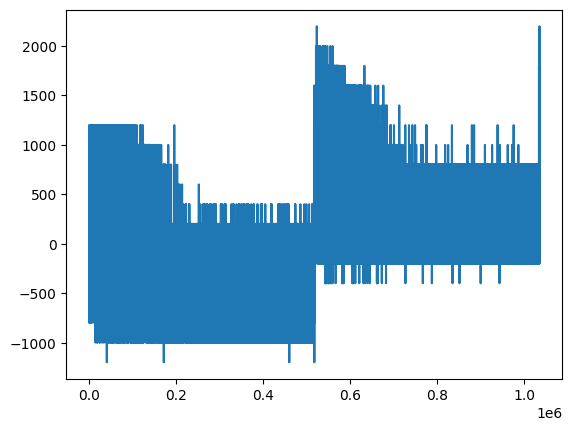

In [17]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [18]:
X = df.drop(['Sum'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0001,19998.21,20002.69,19995.19,19998.23,441.0,9.474930,1.894831e+05,0.000000,0.0
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0001,19997.00,19998.00,19997.00,19997.02,173.0,2.829590,5.658343e+04,0.000000,0.0
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0001,19987.74,19998.62,19985.14,19987.76,642.0,25.911260,5.180279e+05,0.000000,0.0
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0001,39858.03,39858.07,39853.57,39858.07,89.0,1.005430,4.007142e+04,0.000000,0.0
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0001,49822.24,49860.68,49803.54,49822.29,238.0,7.058411,3.517801e+05,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,35.556670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0001,20100.00,20111.00,20090.47,20099.98,1169.0,72.755640,1.462424e+06,38.955066,0.0
1035983,0.109080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0001,40155.03,40165.00,40154.99,40154.99,64.0,0.414450,1.664380e+04,55.360821,0.0
1035984,0.089730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0001,40089.32,40097.68,40089.28,40089.28,42.0,0.367120,1.471828e+04,55.299953,0.0
1035985,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0001,30036.85,30036.85,30026.53,30036.82,94.0,1.743990,5.237727e+04,45.692957,0.0


## Y paramiter for feedind Model

In [19]:
y = df['Sum']
y

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1035982    500.0
1035983    500.0
1035984    400.0
1035985    500.0
1035986    600.0
Name: Sum, Length: 1035987, dtype: float64

## Model for AI Research

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(len(predictions))
print(y_test)
accuracy_score(y_test, predictions)

[ 100.    0.  400. ... -100. -100.    0.]
103599
78922     100.0
900582      0.0
911923    400.0
795025      0.0
777659    100.0
          ...  
548540    300.0
267225   -400.0
441355   -100.0
101976   -100.0
399914      0.0
Name: Sum, Length: 103599, dtype: float64


0.998542456973523

## Export Train model

In [22]:
import joblib
model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_rsi_trand_predictor.joblib")

['btcbusd_rsi_trand_predictor.joblib']

In [ ]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))